# Sprint 5 - T 2

Ejercicios de **Train-Test** con con **ScikitLearn** a partir de un dataset con información sober las viviendas de Houston.

### Exercici 1

**Parte el conjunto de datos adjunto en train y test. Estudia los dos conjuntos por separado a nivel descriptivo.**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 


ruta_archivo = "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 5 T2\\housing data.csv"

#Antes de empezar a trabajar con el archivo he observado queb no las columnas no tienen nombre, 
#de manera que al importar el archivo las añadimos directamente

df_houses = pd.read_csv(ruta_archivo, names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
df_houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Fuente del dataset:. 

Title: Boston Housing Data

Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993
   
Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.
                         Esto indica que hay una variable que es binaria (seguramente se podrá convertir en categoría). También nos indica que la variable MEDV está considerada "variable clase". 

Una vez tenemos el archivo descargado, pasaremos a limpiar los datos:
* ver si contiene duplicados
* ver si contiente valores NAN
* ver si contiene valores Nulos
    
El siguiente paso será analizarlos brevemente:
* forma (shape)
* tipo de datos (info)
* principales valores estadísticos (describe)
* cambio de tipo de datos en caso de ser necesario


Empezamos con la limpieza:

In [2]:
df_houses.drop_duplicates()
df_houses.shape

(506, 14)

In [3]:
df_houses.isnull().sum().sum()

0

In [4]:
df_houses.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Hemos visto que el dataset no necesitaba limpieza. No tenía valores duplicados, ni valores NAN ni valores Null. Podemos preceder a hacer un breve análisis sobre el dataset. Pero antes, adjuntaré una breve explicación sobre el significado de cada una de las variables del dataset.

1. **CRIM**: Tasa de criminalidad per cápita por ciudad.
2. **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados. Valor más pequeño significa zona con edificios más altos y casas más juntas. 
3. **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
4. **CHAS**: Variable ficticia Charles River (= 1 si el terreno limita con el río; 0 en caso contrario).
5. **NOX**: Concentración de óxidos de nitrógeno (partes por cada 10 millones).
6. **RM**: Número promedio de habitaciones por vivienda.
7. **AGE**: Proporción de unidades ocupadas por propietarios construidas antes de 1940.
8. **DIS**: Distancias ponderadas a cinco centros de empleo en Boston.
9. **RAD**: Índice de accesibilidad a carreteras radiales.
10. **TAX**: Tasa de impuesto a la propiedad de valor completo por cada 10,000UDS.
11. **PTRATIO**: Relación entre estudiantes y profesores por ciudad.
12. **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad.
13. **LSTAT**: Porcentaje de población de estatus socioeconómico bajo.
14. **MEDV**: Valor mediano de las viviendas ocupadas por sus propietarios en 1000USD.

Ahora si que podemos empezar con el breve análisis:

In [5]:
df_houses.shape

(506, 14)

In [6]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Una vez realizada la limpieza y hemos visto los detalles del dataset. Es el momento de **dividir** el dataset de manera random en dos subsets. El train con el 80% de los registros y el test con el 20% restantes. Pero antes hay que tener en cuenta que la columna MEDV es la variable clase, sobre la que querríamos hacer predicciones.

In [8]:
from sklearn.model_selection import train_test_split
y= df_houses["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(df_houses,y, test_size=0.2, random_state=0)

print("Tamaño de conjunto de entrenamiento:", len(X_train))
print("Tamaño de conjunto de prueba:", len(X_test))

Tamaño de conjunto de entrenamiento: 404
Tamaño de conjunto de prueba: 102


In [9]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307.0,17.4,391.70,9.71,26.7
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305.0,19.2,376.94,9.88,21.7
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300.0,16.6,391.25,11.38,22.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666.0,20.2,127.36,26.64,10.4


In [10]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34,22.6
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50,23.0
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77,8.3
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34,21.2


In [11]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.386324,8.137943,0.00632,0.078935,0.25651,3.359357,88.9762
ZN,404.0,11.794554,23.636906,0.00000,0.000000,0.00000,20.000000,100.0000
INDUS,404.0,11.123441,6.993011,0.46000,5.130000,9.12500,18.100000,27.7400
CHAS,404.0,0.069307,0.254290,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.555886,0.115201,0.38500,0.449000,0.53800,0.631000,0.8710
RM,404.0,6.301797,0.694692,3.56100,5.887750,6.21100,6.675000,8.7800
AGE,404.0,69.027228,28.106955,2.90000,45.675000,77.95000,93.900000,100.0000
DIS,404.0,3.770242,2.080583,1.17420,2.087875,3.19095,5.141475,12.1265
RAD,404.0,9.403465,8.661147,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,404.0,402.844059,170.857022,187.00000,276.000000,322.00000,666.000000,711.0000


In [12]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,4.513411,10.230340,0.0136,0.094115,0.249035,5.178705,73.5341
ZN,102.0,9.656863,22.061680,0.0000,0.000000,0.000000,0.000000,85.0000
INDUS,102.0,11.189608,6.339877,0.7400,5.885000,9.900000,18.100000,21.8900
CHAS,102.0,0.068627,0.254068,0.0000,0.000000,0.000000,0.000000,1.0000
NOX,102.0,0.549979,0.118982,0.3920,0.448000,0.520000,0.605000,0.8710
RM,102.0,6.216657,0.732735,3.8630,5.881000,6.157000,6.469000,8.7250
AGE,102.0,66.783333,28.382215,8.4000,39.625000,72.550000,95.200000,100.0000
DIS,102.0,3.893275,2.210300,1.1296,2.135475,3.347500,5.186050,10.7103
RAD,102.0,10.127451,8.907302,1.0000,4.000000,5.000000,24.000000,24.0000
TAX,102.0,429.598039,158.010105,224.0000,304.000000,384.000000,666.000000,666.0000


Para poder hacer una buena comparación vamos a crear una manera de visualizar las medias, desviacion, standard del dataset entero, del train y del test.

In [13]:
media_df = df_houses.mean().round(3)
std_df = df_houses.std().round(3)
min_df = df_houses.min().round(3)
max_df = df_houses.max().round(3)

media_train = X_train.mean().round(3)
std_train = X_train.std().round(3)
min_train = X_train.min().round(3)
max_train = X_train.max().round(3)

media_test = X_test.mean().round(3)
std_test = X_test.std().round(3)
min_test = X_test.min().round(3)
max_test = X_test.max().round(3)

estadisticas = pd.DataFrame({"Media df": media_df,
                             "Media Train": media_train,
                             "Media Test": media_test,
                             "Desv Std df": std_df,
                             "Desv Std Train": std_train,
                             "Desv Std Test": std_test,
                             "V Min df": min_df,
                             "V Min Train": min_train,
                             "V Min Test": min_test,
                             "V Max df": max_df,
                             "V Max Train": max_train,
                             "V Max Test": max_test})


display(estadisticas)

,Media df,Media Train,Media Test,Desv Std df,Desv Std Train,Desv Std Test,V Min df,V Min Train,V Min Test,V Max df,V Max Train,V Max Test
CRIM,3.614,3.386,4.513,8.602,8.138,10.230,0.006,0.006,0.014,88.976,88.976,73.534
ZN,11.364,11.795,9.657,23.322,23.637,22.062,0.000,0.000,0.000,100.000,100.000,85.000
INDUS,11.137,11.123,11.190,6.860,6.993,6.340,0.460,0.460,0.740,27.740,27.740,21.890
CHAS,0.069,0.069,0.069,0.254,0.254,0.254,0.000,0.000,0.000,1.000,1.000,1.000
NOX,0.555,0.556,0.550,0.116,0.115,0.119,0.385,0.385,0.392,0.871,0.871,0.871
RM,6.285,6.302,6.217,0.703,0.695,0.733,3.561,3.561,3.863,8.780,8.780,8.725
AGE,68.575,69.027,66.783,28.149,28.107,28.382,2.900,2.900,8.400,100.000,100.000,100.000
DIS,3.795,3.770,3.893,2.106,2.081,2.210,1.130,1.174,1.130,12.126,12.126,10.710
RAD,9.549,9.403,10.127,8.707,8.661,8.907,1.000,1.000,1.000,24.000,24.000,24.000
TAX,408.237,402.844,429.598,168.537,170.857,158.010,187.000,187.000,224.000,711.000,711.000,666.000


Observamos que en general los datos del dataset train se parecen bastante el dataset general. En cambio el dataset test presenta algunas diferencias en valores como CRIM, o ZN, o TAX o B. No se si sería conveniente buscar un nuevo test usando otro random_rage. 
Proseguiremos el estudio analizando las correlaciones entre diferentes variables. Y prestaremos una mayor atención a las correlaciones de la variable "MEDV".

In [14]:
df_corr_houses = df_houses.corr()
df_corr_train = X_train.corr()
df_corr_test = X_test.corr()

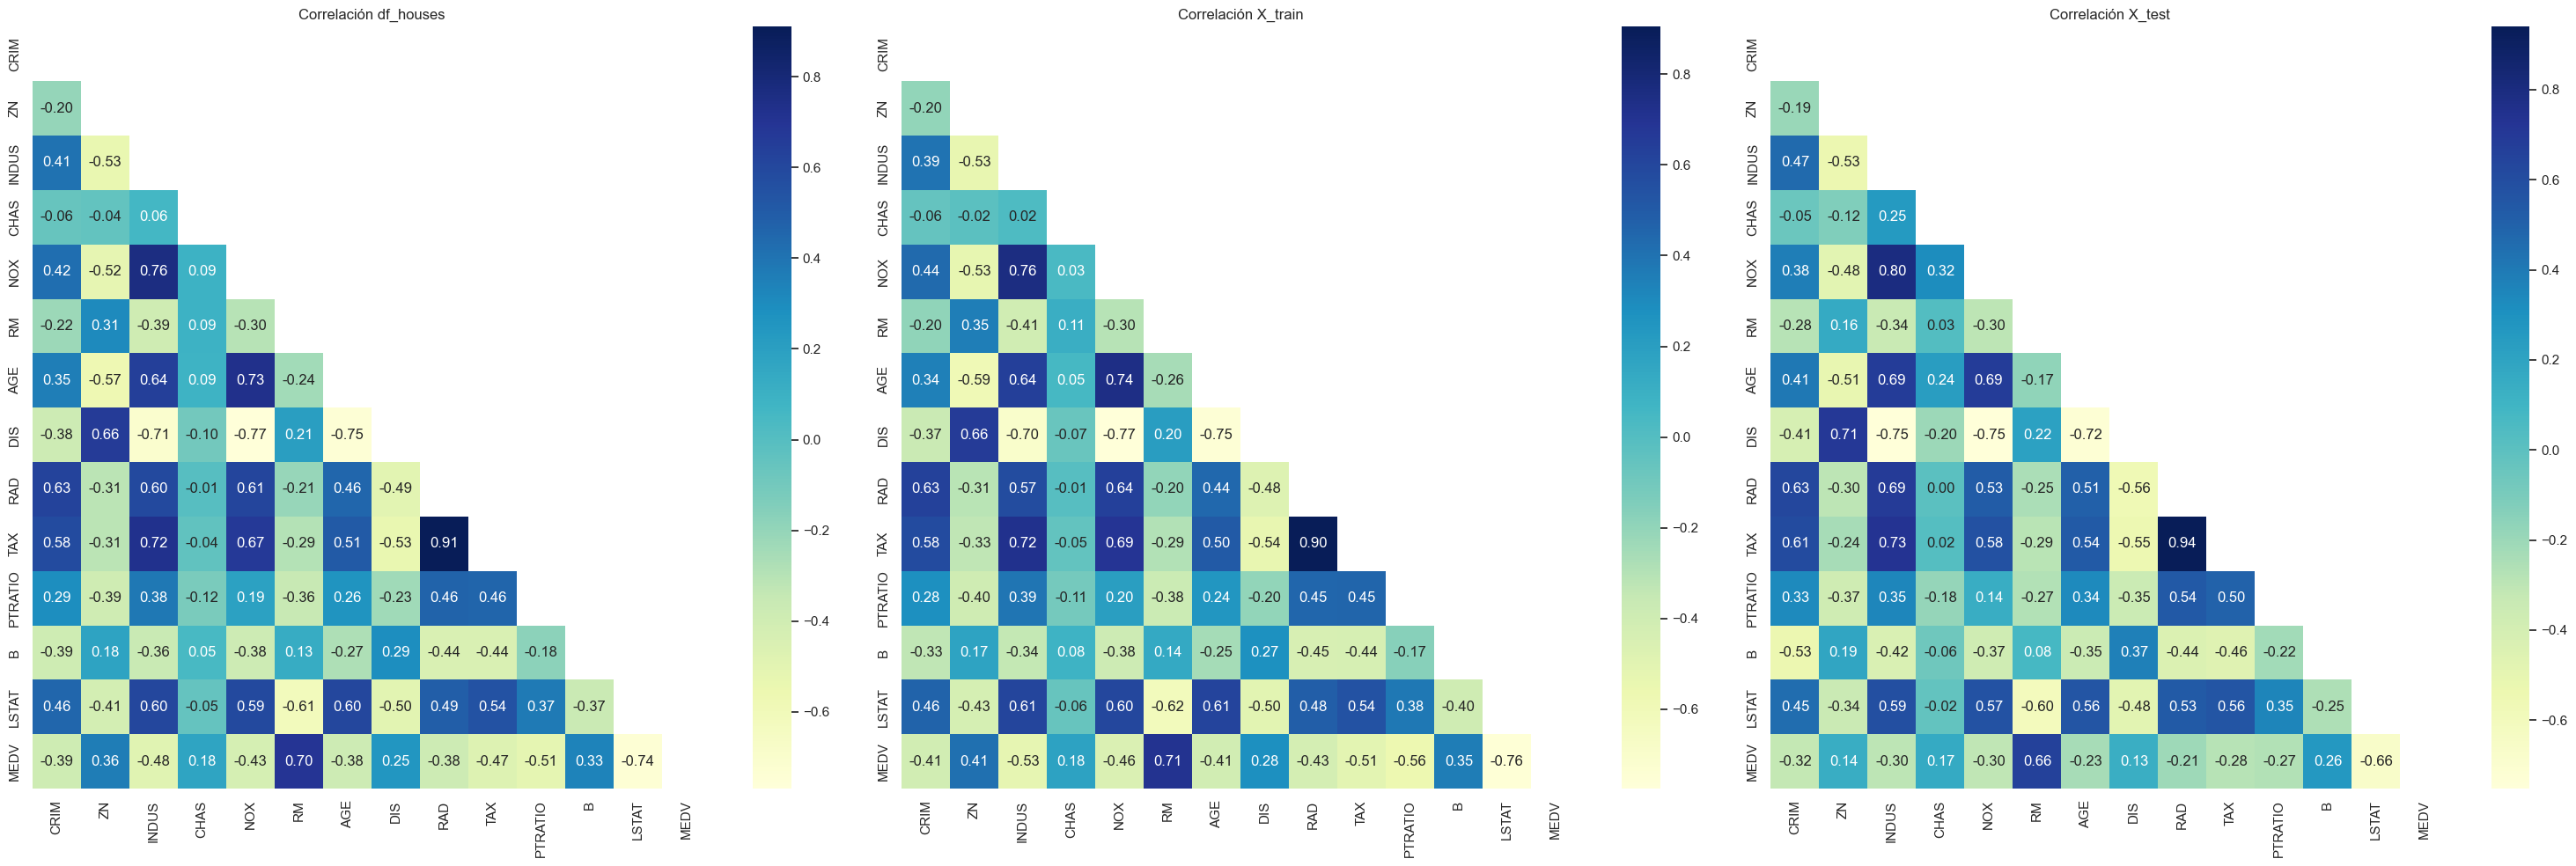

In [15]:
sns.set(style='white')

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

dataframes = [df_corr_houses, df_corr_train, df_corr_test]
titles = ["Correlación df_houses", "Correlación X_train", "Correlación X_test"]

#Este bucle itera a través de la función zip() que combina los elementos de las listas dataframes y titles.
#enumerate se utiliza para obtener tanto el índice i como los valores df_corr (el DataFrame de correlación) y title (el título del gráfico) en cada iteración.
for i, (df_corr, title) in enumerate(zip(dataframes, titles)):
    mask = np.triu(np.ones_like(df_corr, dtype=bool)) #np.triu() crea una mascar sup triangular, es simétrica y no necesita mostrar duplicados. 
    sns.heatmap(df_corr, annot=True, cmap='YlGnBu', fmt=".2f", mask=mask, ax=axes[i])
    axes[i].set_title(title)

# Ajustar el diseño de los subplots y mostrar la figura
plt.tight_layout()
plt.show()


Por último, compararemos las distribuciones de cada variable comparándo las distribuciones del dataframe original, con el del train y el del test.

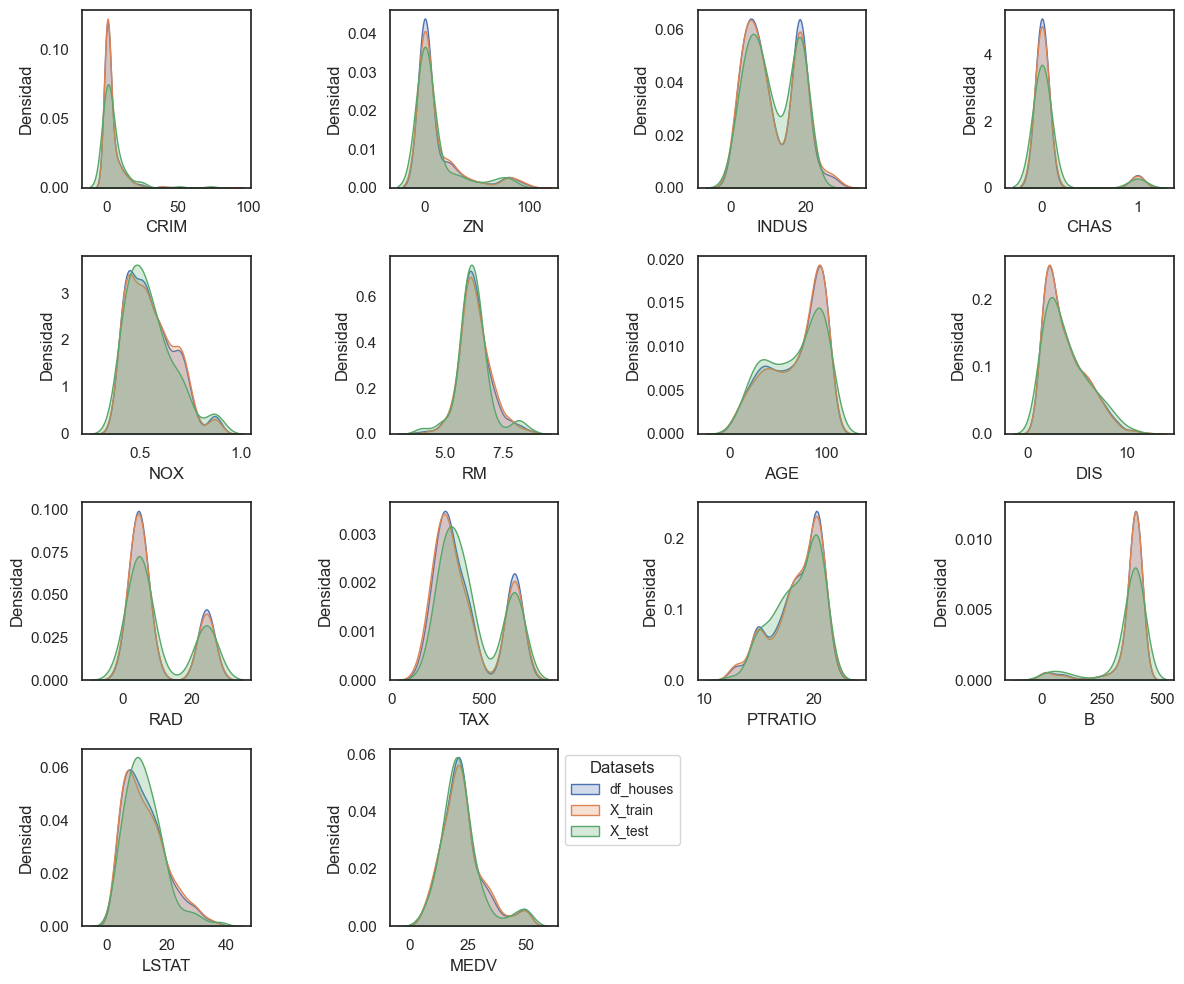

In [16]:
# Obtenemos una lista de nombres de columnas
columnas = df_houses.columns

plt.figure(figsize=(12, 10)) 

legend_labels = []

# Iteramos a través de las columnas y trazar el gráfico de densidad de kernel para cada una de ellas
for columna in columnas:
    plt.subplot(4, 4, columnas.get_loc(columna) + 1)  
    
    
    sns.kdeplot(data=df_houses[columna], label="df_houses", shade=True)
    sns.kdeplot(data=X_train[columna], label="X_train", shade=True)
    sns.kdeplot(data=X_test[columna], label="X_test", shade=True)
    
    plt.xlabel(columna)
    plt.ylabel("Densidad")
    legend_labels.extend(["df_houses", "X_train", "X_test"])


# Añadimos una leyenda general fuera de los gráficos
plt.legend(legend_labels, title="Datasets", loc="upper left", bbox_to_anchor=(1, 1), fontsize='small')


plt.tight_layout()

plt.show()

Para poder hacer un estudio sobre los datos primero los he limpiado, luego he creado un dataset train con el 80% de los valores y un dataset test con el 20% restante. Para poder ver si ambos datasets creados se parecían en distribución al dataset origina (df_houses). He podido observar que el dataset train si que sigue las tendencias del dataset original. En cambio el dataset test en algunas variables como CRIM, B o LSTAT no seguía tanto al dataset original. Esto hace que nos planteemos si realmente se debería volver a crear otro dataset test que se adapte más o no. 

También se ha analizado las relaciones entre variables, tanto en el dataset original como en los otros dos creados. Vemos que los resultados son muy parecidos así que no se aprecia una diferencia significativa entre datasets. Lo cual es muy positivo para poder trabajar con ellos. Vemos que hay variables como INDUS o NOX están relacionadas positivamente con bastantes variables, en cambio la variable DIS tiene bastantes relaciones negativas con otras variables. También he observado que hay una  relación muy elevada entre la variable RAD y TAX. 

Al tratarse de un estudio del precio de las viviendas la variable que nos interesa más analizar sus relaciones es MEDV y vemos que tiene una relación positiva con RM (el número promedio de habitaciones) y una relación negativa con LSTAT (porcentaje de población con un status bajo).

Otra cosa que hemos observado en los datos es que ninguna de las variables sigue una distribución gaussiana (o normal).


### Ejercicio 2

**Aplica algún proceso de transformación (estandarditzar los datos numéricos, crear columnae dummies, polinomios...).**

Visualmente ya hemos visto que las variables no siguen una distribucuón normal, pero vamos a realizar un test de hipótesis para cada una de las variables y así comprobarlo. Para ello haremos el test **Saphiro-Wilk-test**.

La Ho:  la variable sigue una distribución normal
La H1: la variable no sigue una distribución normal

Con un nivel de significancia alfa del 5%.

Primero lo haremos para el train:


In [17]:
from scipy.stats import shapiro
from tabulate import tabulate

# Creamos una lista para almacenar los resultados de la prueba
resultados = []

 
for columna in X_train.columns:
    stat, p = shapiro(X_train[columna])
        
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        resultado= "Probablemente sigue una distribución normal"
    else:
        resultado= "Probablemente no sigue una distribución normal"
        
    resultados.append([columna, stat, p, resultado])

# Imprimimos los resultados en formato tabular
tabla_resultados = tabulate(resultados, headers=["Columna", "stat", "p", "Resultado"], tablefmt="pretty")
print (tabla_resultados) 
    

+---------+---------------------+------------------------+------------------------------------------------+
| Columna |        stat         |           p            |                   Resultado                    |
+---------+---------------------+------------------------+------------------------------------------------+
|  CRIM   | 0.44332295656204224 | 1.7688021655257976e-33 | Probablemente no sigue una distribución normal |
|   ZN    | 0.5673146843910217  | 2.078160412479741e-30  | Probablemente no sigue una distribución normal |
|  INDUS  | 0.8996255993843079  | 1.1659693333783958e-15 | Probablemente no sigue una distribución normal |
|  CHAS   |  0.275098979473114  | 7.311244917983412e-37  | Probablemente no sigue una distribución normal |
|   NOX   | 0.9406697154045105  | 1.2736749155362048e-11 | Probablemente no sigue una distribución normal |
|   RM    | 0.9724017381668091  | 6.216317274265748e-07  | Probablemente no sigue una distribución normal |
|   AGE   | 0.88763731718063

Ahora hacemos lo mismo para el **test.

In [18]:
resultados = []


for columna in X_test.columns:
    stat, p = shapiro(X_test[columna])
        
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        resultado= "Probablemente sigue una distribución normal"
    else:
        resultado= "Probablemente no sigue una distribución normal"
        
    resultados.append([columna, stat, p, resultado])

tabla_resultados = tabulate(resultados, headers=["Columna", "stat", "p", "Resultado"], tablefmt="pretty")
print (tabla_resultados) 

+---------+---------------------+------------------------+------------------------------------------------+
| Columna |        stat         |           p            |                   Resultado                    |
+---------+---------------------+------------------------+------------------------------------------------+
|  CRIM   | 0.4814741611480713  | 2.6516626148508214e-17 | Probablemente no sigue una distribución normal |
|   ZN    | 0.5002279281616211  | 5.2958309733519123e-17 | Probablemente no sigue una distribución normal |
|  INDUS  | 0.8832658529281616  | 2.0060149097389512e-07 | Probablemente no sigue una distribución normal |
|  CHAS   | 0.27416783571243286 | 3.5316870456212186e-20 | Probablemente no sigue una distribución normal |
|   NOX   | 0.9068801999092102  | 2.4801183826639317e-06 | Probablemente no sigue una distribución normal |
|   RM    | 0.8932006359100342  | 5.555849043048511e-07  | Probablemente no sigue una distribución normal |
|   AGE   | 0.90103763341903

Hemos comprobado numéricamente que ni los datos del train ni del test siguen una distribución normal. El siguiente paso estandarizar las variables. Pero para poder hacer eso, primero hemos de saber si contienen outliers o no. Ya que los pasos a seguir son diferentes dependiendo de si los tienen.

Primero haremos los del X_train

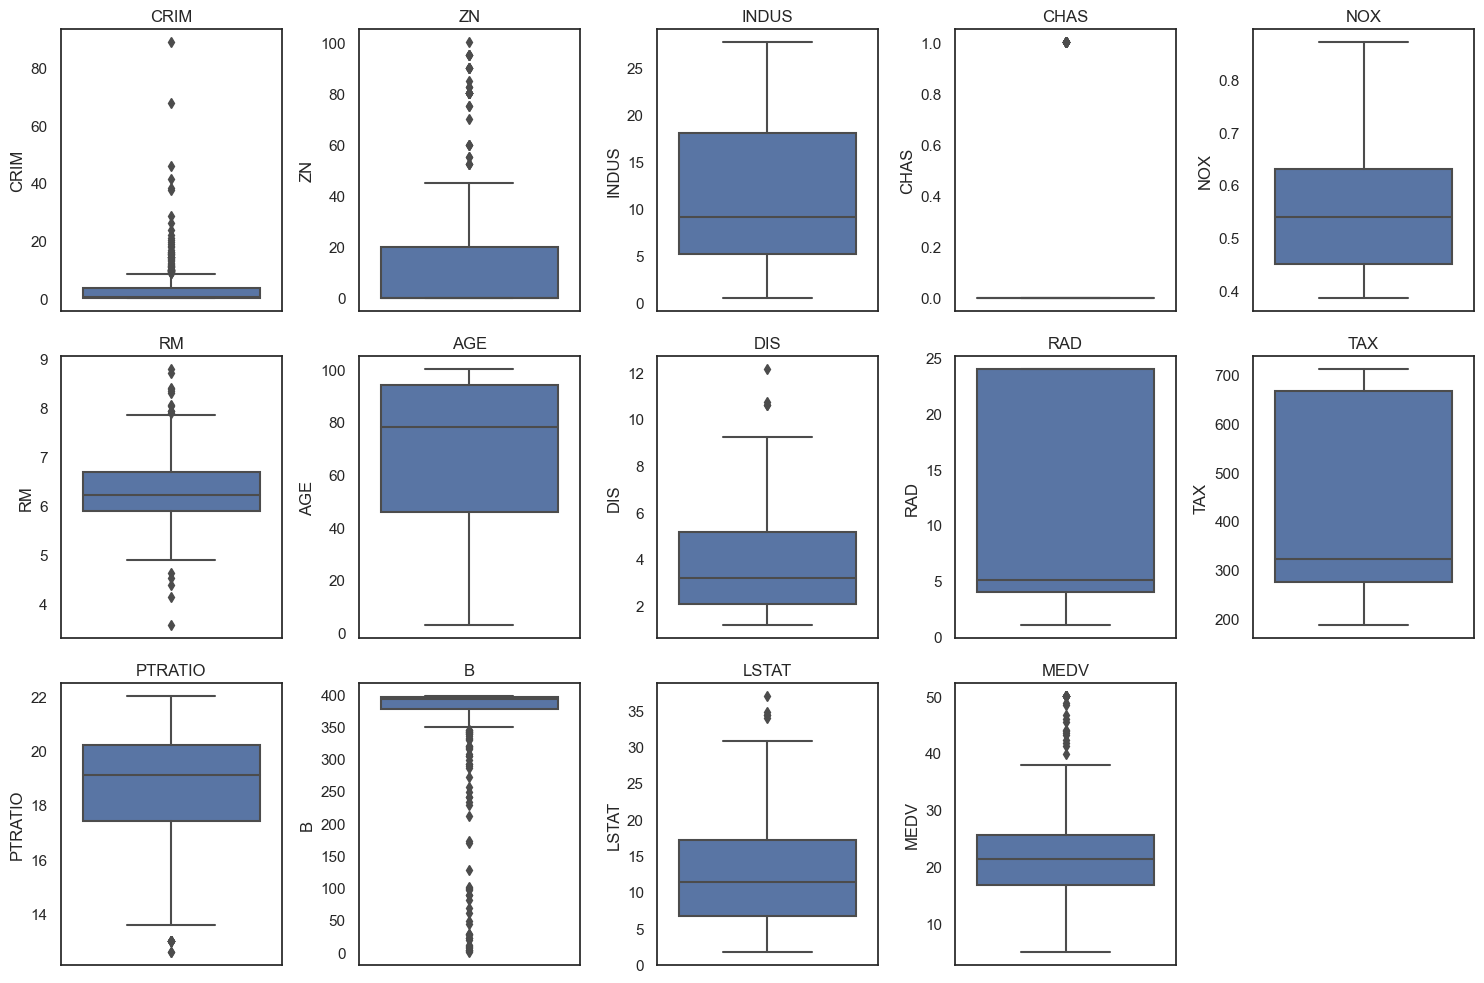

In [19]:
plt.figure(figsize=(15, 10))

for columna in X_train.columns:
    plt.subplot(3, 5, X_train.columns.get_loc(columna) + 1)
    sns.boxplot(y=X_train[columna], orient='vertical')
    plt.title(columna)

plt.tight_layout()

plt.show()

De las 14 columnas de este dataset 8 tienen outliers: CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT Y MEDV.

Ahora vamos a hacer lo mismo con el dataset de test (X_test).

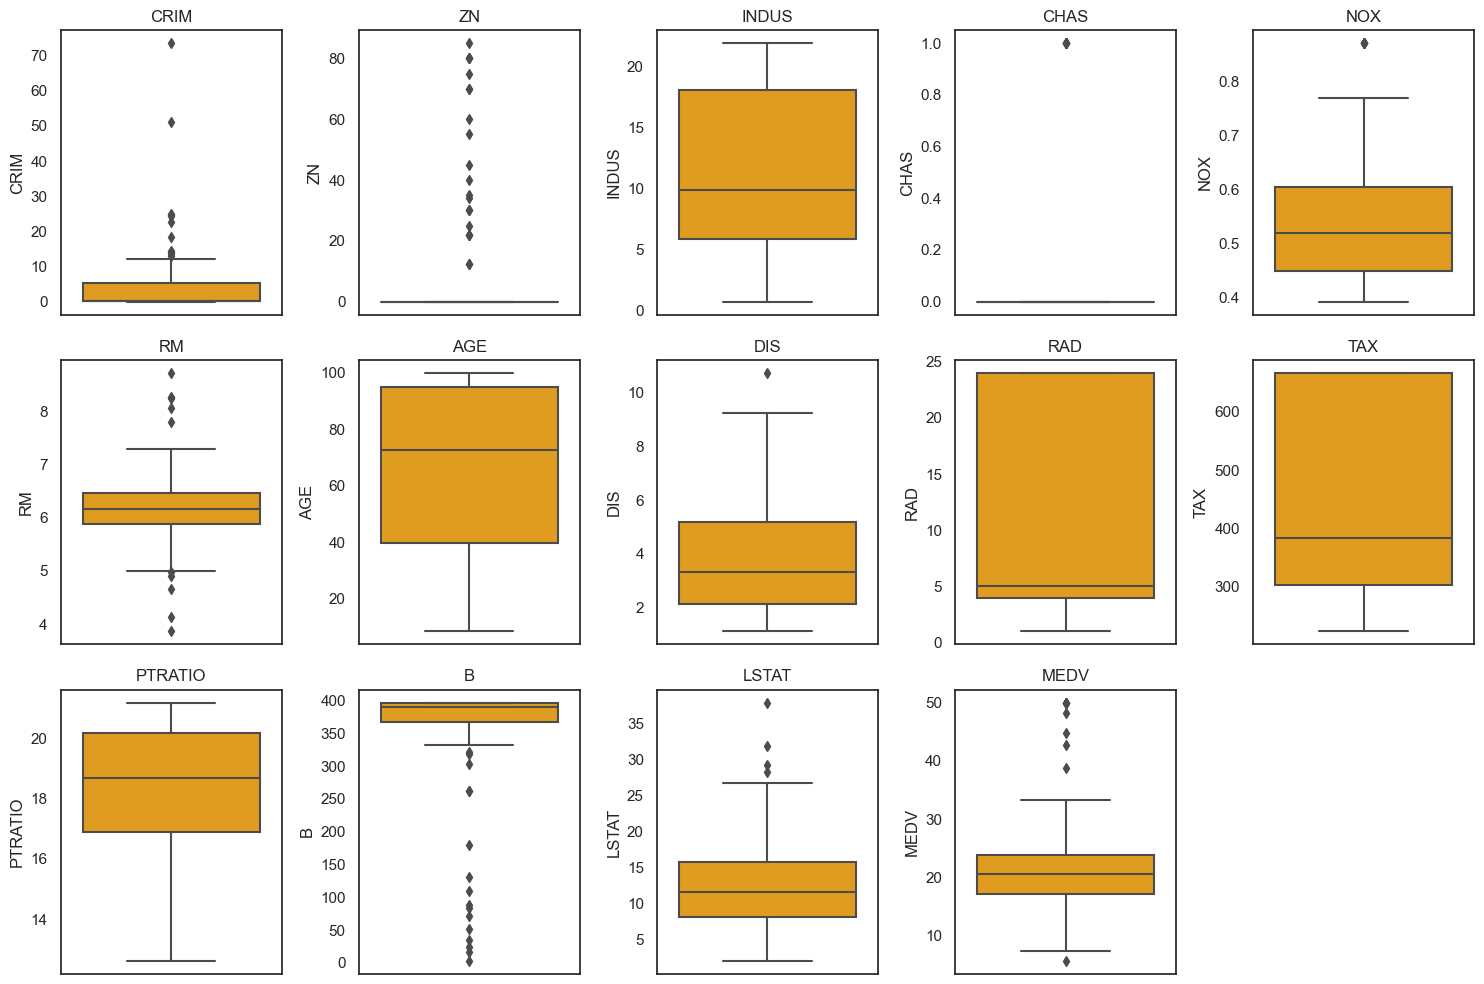

In [20]:
plt.figure(figsize=(15, 10))

for columna in X_test.columns:
    plt.subplot(3, 5, X_test.columns.get_loc(columna) + 1)
    sns.boxplot(y=X_test[columna], orient='vertical', color= "orange")
    plt.title(columna)

plt.tight_layout()

plt.show()

En este caso hay 8 variables con outliers y en este caso son las mismas a escepción de PTRATIO que en este caso no tiene outliers, pero NOX si que los tiene.

Vamos a estandardizar las variables del train (X_train). Primero estandarizaremos las que no tienen outlier. Para eso usamos el método **MinMaxScaler.**

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Especificamos las columnas a escalar
columnas_a_escalar = ["INDUS", "NOX", "AGE", "RAD", "TAX", "PTRATIO"]

X_train_scaled = X_train.copy()  # Creamos una copia del DataFrame original
X_train_scaled[columnas_a_escalar] = scaler.fit_transform(X_train[columnas_a_escalar])

df_tr_sd_no = X_train_scaled.copy()

display(df_tr_sd_no)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
220,0.35809,0.0,0.210411,1,0.251029,6.951,0.881565,2.8617,0.304348,0.229008,0.510638,391.70,9.71,26.7
71,0.15876,0.0,0.379399,0,0.057613,5.961,0.150360,5.2873,0.130435,0.225191,0.702128,376.94,9.88,21.7
240,0.11329,30.0,0.163856,0,0.088477,6.897,0.529351,6.3361,0.217391,0.215649,0.425532,391.25,11.38,22.0
6,0.08829,12.5,0.271628,0,0.286008,6.012,0.656025,5.5605,0.173913,0.236641,0.276596,395.60,12.43,22.9
417,25.94060,0.0,0.646628,0,0.604938,5.304,0.887745,1.6475,1.000000,0.914122,0.808511,127.36,26.64,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,0.253666,0,0.222222,5.708,0.735324,4.7211,0.173913,0.190840,0.744681,391.13,11.74,18.5
192,0.08664,45.0,0.109238,0,0.106996,7.178,0.240989,6.4798,0.173913,0.402672,0.276596,390.49,2.87,36.4
117,0.15098,0.0,0.350073,0,0.333333,6.021,0.820803,2.7474,0.217391,0.467557,0.553191,394.51,10.30,19.2
47,0.22927,0.0,0.236437,0,0.129630,6.030,0.850669,5.6894,0.086957,0.087786,0.563830,392.74,18.80,16.6


Ahora escalaremos las variables que tienen outliers: "CRIM", "ZN","RM","DIS","B","LSTAT" y "MEDV". Para ellos usaremos el **escalado Robusto (Robust Scaling)**: El escalado robusto es útil cuando tienes características con valores atípicos (outliers) y deseas que el escalado sea menos sensible a estos valores.

In [22]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#Especificamos las columnas a escalar:
columnas_a_escalar= ["CRIM","ZN","RM","DIS","B","LSTAT","MEDV"]

X_train_scaled = df_tr_sd_no.copy()  # Creamos una copia del DataFrame original
X_train_scaled[columnas_a_escalar] = scaler.fit_transform(df_tr_sd_no[columnas_a_escalar])

df_tr_sd_def = X_train_scaled.copy()

display(df_tr_sd_def)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
220,0.030966,0.000,0.210411,1,0.251029,0.939981,0.881565,-0.107824,0.304348,0.229008,0.510638,0.005018,-0.153105,0.605714
71,-0.029798,0.000,0.379399,0,0.057613,-0.317561,0.150360,0.686518,0.130435,0.225191,0.702128,-0.735667,-0.136736,0.034286
240,-0.043659,1.500,0.163856,0,0.088477,0.871388,0.529351,1.029981,0.217391,0.215649,0.425532,-0.017564,0.007703,0.068571
6,-0.051280,0.625,0.271628,0,0.286008,-0.252779,0.656025,0.775986,0.173913,0.236641,0.276596,0.200728,0.108811,0.171429
417,7.829507,0.000,0.646628,0,0.604938,-1.152112,0.887745,-0.505453,1.000000,0.914122,0.808511,-13.260068,1.477130,-1.257143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.008356,0.000,0.253666,0,0.222222,-0.638933,0.735324,0.501097,0.173913,0.190840,0.744681,-0.023585,0.042369,-0.331429
192,-0.051783,2.250,0.109238,0,0.106996,1.228326,0.240989,1.077040,0.173913,0.402672,0.276596,-0.055702,-0.811748,1.714286
117,-0.032170,0.000,0.350073,0,0.333333,-0.241346,0.820803,-0.145255,0.217391,0.467557,0.553191,0.146029,-0.096293,-0.251429
47,-0.008304,0.000,0.236437,0,0.129630,-0.229914,0.850669,0.818198,0.086957,0.087786,0.563830,0.057207,0.722195,-0.548571


Ahora ya tenemos todas las columnas del dataset train estandarizado. De manera que los valores de todas las columnas oscilan entre los mismos rangos de valores, a excepción de los outliers que siguen estando "fuera" pero sus valores se han suavizado. Esta estandarización nos permitirá poder trabajar con todos los datos entre si de una manera más coherente.


### Ejercicio 3

**Resume las nuevas columnas generadas de manera estadística y gráfica**

Lo primero que vamos a hacer es hacer un breve resumen estadístico del dataset train (ahora llamado df_tr_sd_def) con el método describe.

In [23]:
df_tr_sd_def.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,0.954089,2.480761,-0.076268,-0.054132,-8.456777e-18,0.945868,27.045202
ZN,404.0,0.589728,1.181845,0.000000,0.000000,0.000000e+00,1.000000,5.000000
INDUS,404.0,0.390889,0.256342,0.000000,0.171188,3.176320e-01,0.646628,1.000000
CHAS,404.0,0.069307,0.254290,0.000000,0.000000,0.000000e+00,0.000000,1.000000
NOX,404.0,0.351617,0.237038,0.000000,0.131687,3.148148e-01,0.506173,1.000000
RM,404.0,0.115334,0.882429,-3.366148,-0.410607,0.000000e+00,0.589393,3.263258
AGE,404.0,0.681022,0.289464,0.000000,0.440525,7.729145e-01,0.937178,1.000000
DIS,404.0,0.189708,0.681354,-0.660450,-0.361238,0.000000e+00,0.638762,2.926235
RAD,404.0,0.365368,0.376572,0.000000,0.130435,1.739130e-01,1.000000,1.000000
TAX,404.0,0.411916,0.326063,0.000000,0.169847,2.576336e-01,0.914122,1.000000


Podemos ver que los valores han cambiado y ahora están en un rango de valores más cercanos a 0. Otra manera de comprobarlo puede ser visualmente con un gráfico de densidad de cada variable.

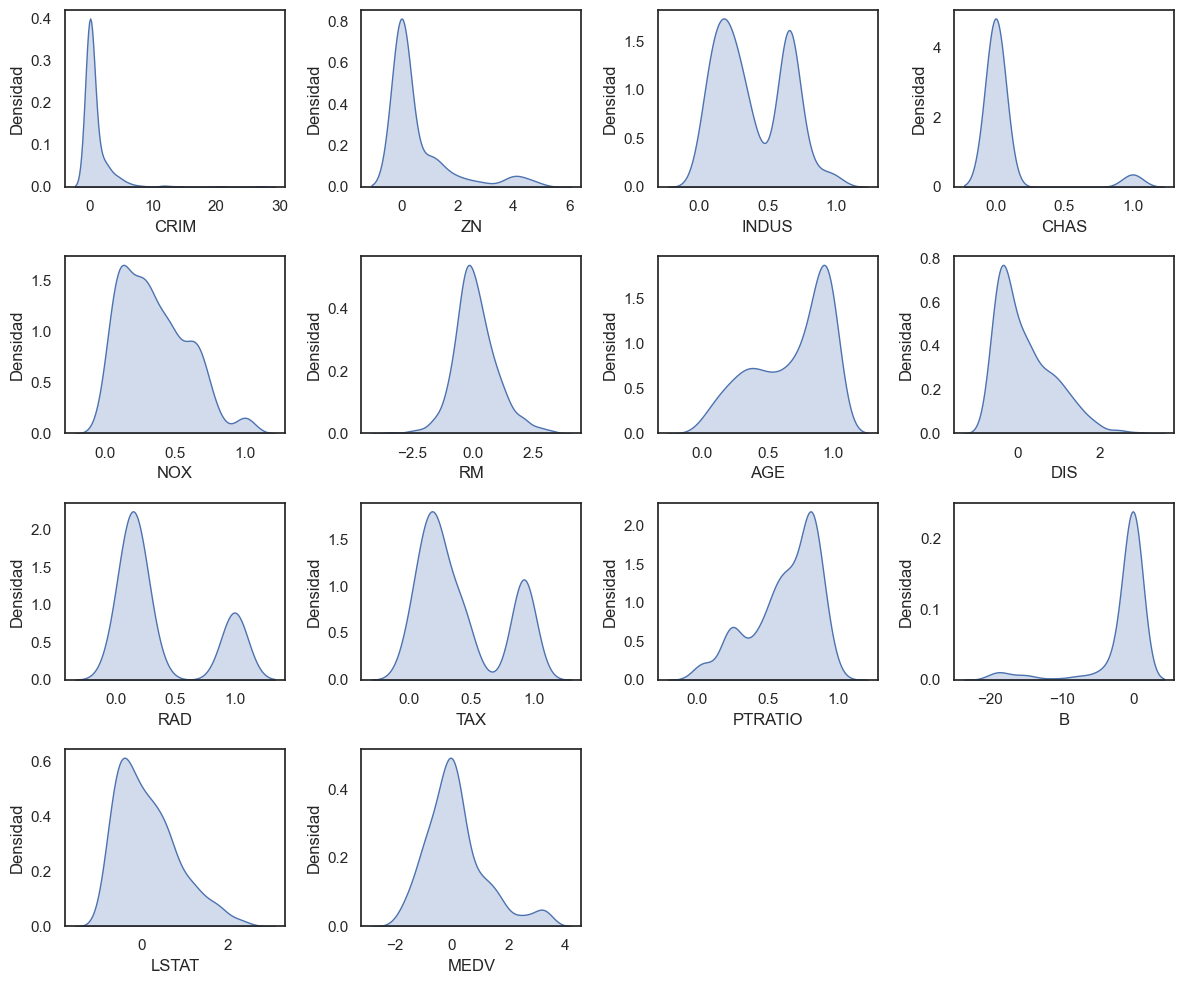

In [24]:
columnas = df_tr_sd_def.columns

plt.figure(figsize=(12, 10)) 

legend_labels = []

for columna in columnas:
    plt.subplot(4, 4, columnas.get_loc(columna) + 1)  
    
    
    sns.kdeplot(data=df_tr_sd_def[columna], label="df_train", shade=True)
    
    plt.xlabel(columna)
    plt.ylabel("Densidad")
 

plt.tight_layout()

plt.show()

Observamos que las formas de las distribuciones de cada variable no han cambiado. Simplemente han variado los rangos de valores entre los que oscilan. 

Por último vamos a comparar los valores de nuevo dataset train estandarizado con el dataset test que no hemos estandarizado para poder observar las diferencias de valores.

In [25]:
media_train = df_tr_sd_def.mean().round(3)
std_train = df_tr_sd_def.std().round(3)
min_train =df_tr_sd_def.min().round(3)
max_train = df_tr_sd_def.max().round(3)

media_test = X_test.mean().round(3)
std_test = X_test.std().round(3)
min_test = X_test.min().round(3)
max_test = X_test.max().round(3)

estadisticas = pd.DataFrame({"Media Train": media_train,
                             "Media Test": media_test,
                             "Desv Std Train": std_train,
                             "Desv Std Test": std_test,
                             "V Min Train": min_train,
                             "V Min Test": min_test,
                             "V Max Train": max_train,
                             "V Max Test": max_test})

display(estadisticas)

,Media Train,Media Test,Desv Std Train,Desv Std Test,V Min Train,V Min Test,V Max Train,V Max Test
CRIM,0.954,4.513,2.481,10.230,-0.076,0.014,27.045,73.534
ZN,0.590,9.657,1.182,22.062,0.000,0.000,5.000,85.000
INDUS,0.391,11.190,0.256,6.340,0.000,0.740,1.000,21.890
CHAS,0.069,0.069,0.254,0.254,0.000,0.000,1.000,1.000
NOX,0.352,0.550,0.237,0.119,0.000,0.392,1.000,0.871
RM,0.115,6.217,0.882,0.733,-3.366,3.863,3.263,8.725
AGE,0.681,66.783,0.289,28.382,0.000,8.400,1.000,100.000
DIS,0.190,3.893,0.681,2.210,-0.660,1.130,2.926,10.710
RAD,0.365,10.127,0.377,8.907,0.000,1.000,1.000,24.000
TAX,0.412,429.598,0.326,158.010,0.000,224.000,1.000,666.000


En esta comparativa se aprecia muy bien la diferencia entre los datos estandarizados de **train** y los datos NO estandarizados del dataset **test**.

El siguiente paso sería estandarizar también el dataset del test. Haciendo un MinMax para las variables que no tengan outliers y un escalado Robusto para las variables que tengan outliers.